In [6]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
num_classes = 10
epochs = 3

In [7]:
train_df = pd.read_csv('fashion-mnist_train.csv',sep = ',')
test_df = pd.read_csv('fashion-mnist_test.csv', sep = ',')

In [8]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
train_data = np.array(train_df, dtype = 'float32')
test_data = np.array(test_df, dtype='float32')

In [12]:
x_train = train_data[:,1:]/255
y_train = train_data[:,0]

x_test= test_data[:,1:]/255
y_test=test_data[:,0]

In [39]:
x_train,x_validate,y_train,y_validate = train_test_split(x_train,y_train,test_size = 0.2)

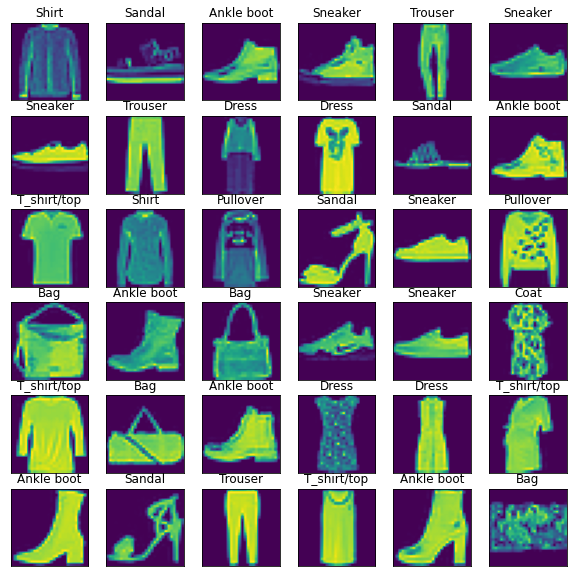

In [14]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10, 10))

for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].reshape((28,28)))
    label_index = int(y_train[i])
    plt.title(class_names[label_index])
plt.show()

In [16]:
rows = 28
cols = 28
size = 4096
image_shape = (rows,cols,1) 

In [36]:
x_train = x_train.reshape(x_train.shape[0],*image_shape)
x_test = x_test.reshape(x_test.shape[0],*image_shape)
x_validate = x_validate.reshape(x_validate.shape[0],*image_shape)

In [18]:
model = Sequential([
    Conv2D(filters=32,kernel_size=3,activation='relu',input_shape = image_shape),
    MaxPooling2D(pool_size=2) ,
    Dropout(0.2),
    Flatten(),
    Dense(10,activation='relu'),
    Dense(10,activation = 'softmax')
    
])

In [37]:
model.compile(loss ='sparse_categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics =['accuracy'])

In [35]:
history = model.fit(
    x_train,
    y_train,
    batch_size=size,
    epochs=3,
    verbose=1,
    validation_data=(x_validate,y_validate),
)

## long à faire tourner

Epoch 1/3
12/12 [==============================] - 108s 9s/step - loss: 0.3591 - accuracy: 0.8762 - val_loss: 0.3531 - val_accuracy: 0.8786
Epoch 2/3
12/12 [==============================] - 28s 2s/step - loss: 0.3506 - accuracy: 0.8803 - val_loss: 0.3489 - val_accuracy: 0.8786
Epoch 3/3
12/12 [==============================] - 24s 2s/step - loss: 0.3481 - accuracy: 0.8782 - val_loss: 0.3418 - val_accuracy: 0.8817


Text(0.5, 1.0, 'Train - Accuracy')

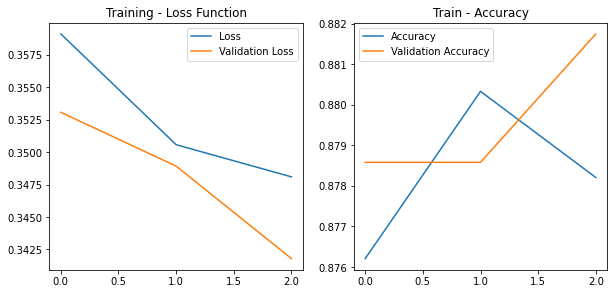

In [38]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

In [26]:
import cv2 
import requests
from PIL import Image
from io import BytesIO

In [31]:
##Fonction API

##transforme l'image pour la prédiction, de même taille que le dataset
def preprocess_image(url):
    
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    
    fig, ax = plt.subplots(nrows = 1, ncols = 3,figsize = (15,20))
    ax[0].imshow(img)
    ax[0].set_title("Image")
    
    ## Grayscale
    img = np.array(img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)   
    img = img / 255.0
    ax[1].imshow(img)
    ax[1].set_title("Image grise")
    
    img = cv2.resize(img, (28,28))
    ax[2].imshow(img)
    ax[2].set_title("Grise + Resize")   
    
    plt.tight_layout()
    
    img = np.expand_dims(img, axis = [0,3])
    return img

##prédiction
def predict_image(url):
    
    img = preprocess_image(url)
    predicted_label = model.predict(img)
    predicted_label = np.argmax(predicted_label, axis = 1)[0]
    return class_names[predicted_label]

'Bag'

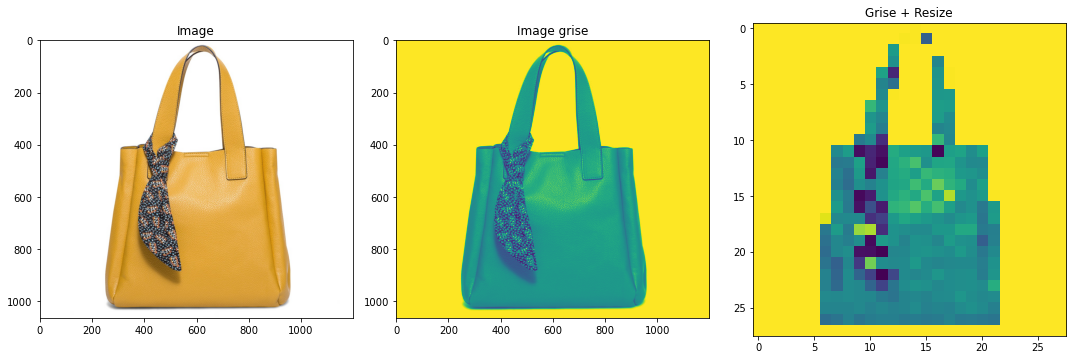

In [34]:
##Prédictions
predict_image("https://images.all-free-download.com/images/graphicthumb/blank_black_tshirt_stock_photo_168263.jpg")
predict_image("https://www.eram.fr/media/catalog/product/cache/1/image/9df78eab33525d08d6e5fb8d27136e95/W/W/WWWERAM_10693841053_0.jpg")